# Exercises

Book: Edsberg, Lennart: Introduction to Computation and Modeling for Differential Equations

## 3.3.10 - Page 53

To prove the statement given by the question, we just translate $\delta u$ by the vector given by the inverse of Jacobian, at the selected aproximation point $\boldsymbol{b}$:

$\delta v = \delta u + J^{-1} c \Rightarrow \delta u = \delta v - J^{-1} c \text{, mas } c = f(b) \Rightarrow f(u + \delta u) = f(u + \delta v - J^{-1} c) = f(b) + J(\delta v - J^{-1}c) = f(b) + J \delta u$

$f(b) + J(\delta v - J^{-1}c) = f(b) + J(\delta v) - J J^{-1}(c) = f(b) + J(\delta v) - c = c + J(\delta v) -c = J(\delta v) \Rightarrow f(u + \delta u) = J(\delta v)$ 

And the constant term vanishes. &#x25A1;

## 3.3.11 - Page 53

First, let's assume the scalar model problem:

$ \frac{du}{dt} = \lambda u \Rightarrow \int \frac{du}{u} = \int \lambda dt \Rightarrow \ln u = \lambda t + c \Rightarrow u(t) = ce^{\lambda t}, f(t, u) = \lambda u$

Now, let's consider the Heun method:

$u_k^* = u_{k-1} + h \cdot f(t_{k-1}, u_{k-1})$, $u_k = u_{k-1} + \frac{h}{2}\left(f(t_{k-1}, u_{k-1}) + f(t_k, u_k^*)\right)$

But $f(u, t) = \lambda u$, which implies:

$u_k^* = u_{k-1} + h \cdot \lambda u_{k-1}$, $u_k = u_{k-1} + \frac{h}{2}\left(\lambda u_{k-1} + \lambda u_k^*\right) = u_{k-1} + \frac{h}{2}\left(\lambda u_{k-1} + \lambda (u_{k-1} + h \cdot \lambda u_{k-1})\right) = u_{k-1} + \frac{h}{2}\left(\lambda u_{k-1} + \lambda u_{k-1} + h \cdot \lambda^2 u_{k-1})\right) = $

$u_{k-1} + h \lambda u_{k-1} + \frac{h^2 \cdot \lambda^2 u_{k-1}}{2} = \left(1 + h \lambda + \frac{(h \lambda)^2}{2}\right) u_{k-1} = \left(1 + h \lambda + \frac{(h \lambda)^2}{2}\right) u_{k-1} = \left(1 + h \lambda + \frac{(h \lambda)^2}{2}\right)^k u_0$

Which implies should $ \left| 1 + h \lambda + \frac{(h \lambda)^2}{2} \right| < 1 $

A área da região acima pode ser vista na figura abaixo, assumindo $h \lambda = x + iy$, que leva a:

$\left(1 + x + \frac{x^2-y^2}{2}\right) + \left(y + xy\right)^2 < 1$, representado pelo interior da curva fechada representada abaixo:

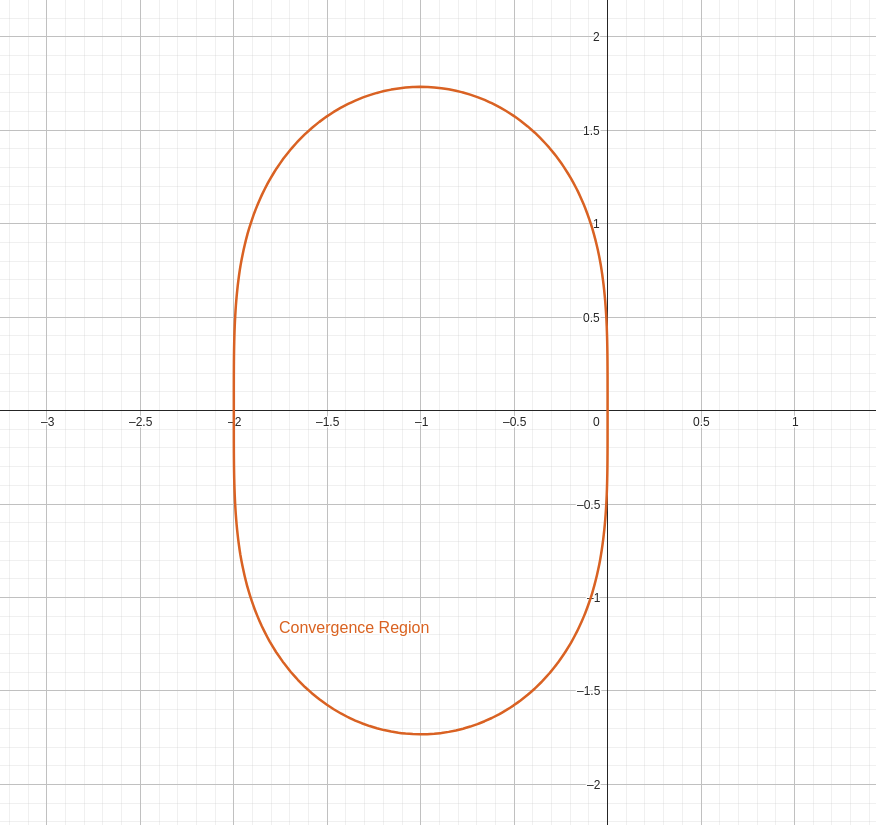



## 3.3.13 - Page 56

Scalar Model problem: $ \frac{du}{dt} = \lambda u \Rightarrow \int \frac{du}{u} = \int \lambda dt \Rightarrow \ln u = \lambda t + c \Rightarrow u(t) = ce^{\lambda t}, f(t, u) = \lambda u$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 

def uk(uk_1, lambda_ = -1, h = 0.0):
    return ((1 + h * lambda_ / 2)/(1 - h * lambda_ /2))*uk_1

def evaluate_numeric(u0, lambda_ = -1, h = 0.01, start = 0, end = 5):
    t = np.arange(start, end + h, h)
    values = [u0]
    for i in range(1, len(t)):
        values.append(uk(values[i-1], lambda_, h))
    return np.vstack((np.transpose(t), np.transpose(values)))

results_1 = evaluate_numeric(10, -1)
results_2 = evaluate_numeric(10, -2)
results_5 = evaluate_numeric(10, -5)
results_10 = evaluate_numeric(10, -10)
results_20 = evaluate_numeric(10, -20)

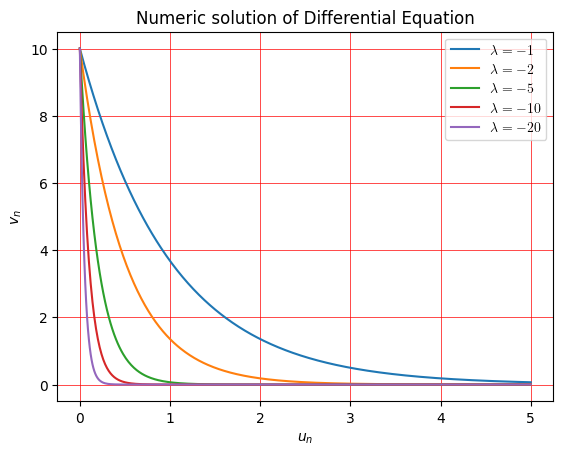

In [2]:
ig, ax = plt.subplots()

plt.rcParams['text.usetex'] = True

plt.plot(results_1[0], results_1[1], label=r'$\lambda = -1$')
plt.plot(results_2[0], results_2[1], label=r'$\lambda = -2$')
plt.plot(results_5[0], results_5[1], label=r'$\lambda = -5$')
plt.plot(results_10[0], results_10[1], label=r'$\lambda = -10$')
plt.plot(results_20[0], results_20[1], label=r'$\lambda = -20$')

ax.set_axisbelow(True)
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')

ax.set_xlabel(r'$u_n$')
ax.set_ylabel(r'$v_n$')
plt.title('Numeric solution of Differential Equation')
plt.legend()

ax = plt.gca()

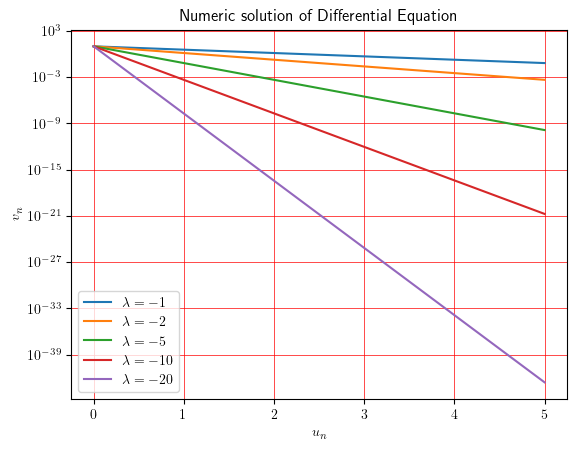

In [3]:
ig, ax = plt.subplots()

plt.rcParams['text.usetex'] = True

plt.plot(results_1[0], results_1[1], label=r'$\lambda = -1$')
plt.plot(results_2[0], results_2[1], label=r'$\lambda = -2$')
plt.plot(results_5[0], results_5[1], label=r'$\lambda = -5$')
plt.plot(results_10[0], results_10[1], label=r'$\lambda = -10$')
plt.plot(results_20[0], results_20[1], label=r'$\lambda = -20$')

ax.set_axisbelow(True)
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.set_yscale('log')
ax.set_xlabel(r'$u_n$')
ax.set_ylabel(r'$v_n$')
plt.title('Numeric solution of Differential Equation')
plt.legend()

ax = plt.gca()